Generalização baseado em instancia 

In [1]:
from sklearn.datasets import load_wine
wine = load_wine() 
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y) 

((178, 13), (178,), {0, 1, 2})

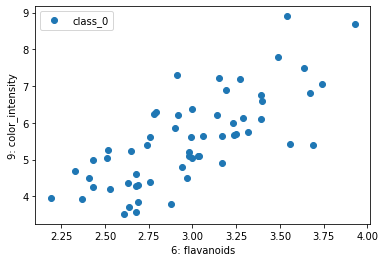

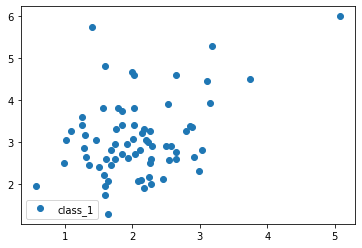

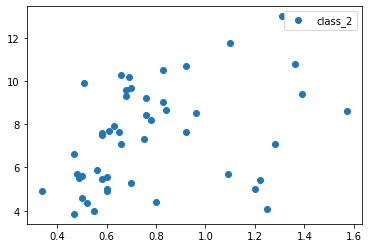

In [12]:
import matplotlib.pyplot as plt
i, j = 6,9
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
    plt.legend()
    plt.show()


In [7]:
X69 = X [:, [6,9]]
X69.shape

(178, 2)

In [8]:
import numpy as np
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz 
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
            return ypred
    

In [14]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia 

0.33146067415730335

In [16]:
ntreino = int(len(y)*0.8)
X_treino, X_teste = X[:ntreino], X[ntreino:]
X_treino.shape, X_teste.shape

((142, 13), (36, 13))

In [23]:
y_treino, y_teste = y[:ntreino], y[ntreino:]

In [36]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia 

1.0

Codigo train_test_split do site sklearn

In [37]:
from sklearn.model_selection import train_test_split
X_traino, X_teste, y_traino, y_teste = train_test_split(X, y, test_size=0.33, 
random_state=42)

from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia 
 

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

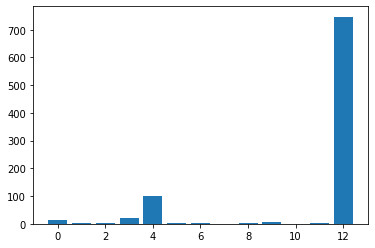

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

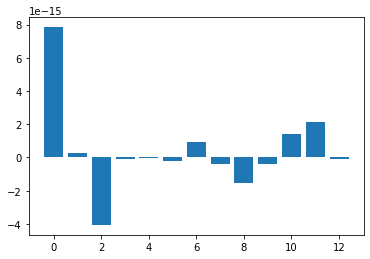

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

plt.bar(list(range(X.shape[1])), np.mean(X_new, axis=0))
plt.show

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)
sempad = np.mean(scores['test_score'])
print(f"Sem padronização {sempad}")



Sem padronização 0.9555555555555555


C:\Users\fabio\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fabio\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [46]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização {compad}")

Com padronização 0.9888888888888889


In [47]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("padronizacao", scaler),
    ("classificador", LogisticRegression())
])

scores = cross_validate(modelo, X, y)
alinha = np.mean(scores['test_score'])
print(f"alinhado {alinha}")


alinhado 0.9831746031746033


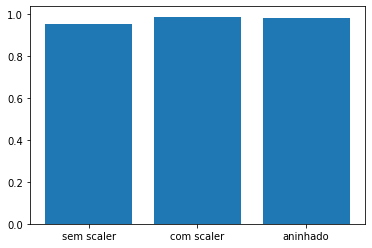

In [48]:
colunas = ["sem scaler", "com scaler", "aninhado"]
plt.bar(colunas, [sempad, compad, alinha])
plt.show()


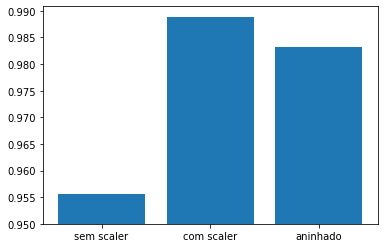

In [49]:
plt.bar(colunas, np.array([sempad, compad, alinha])-0.95, bottom=0.95)
plt.show()